In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from pyresample import kd_tree, geometry 

np.fromfile(fname, dtype=dt)
array([((10, 0), 98.25)],
      dtype=[('time', [('min', '<i4'), ('sec', '<i4')]), ('temp', '<f8')])

In [2]:
grd_file = r'/Users/gonzalgo/Downloads/greenl_00411_16035_004_160326_ALTTBB_HH_03.hgt.grd'

In [3]:
glob.glob('/Users/gonzalgo/Downloads/*')

['/Users/gonzalgo/Downloads/InstallBackupAndSync.dmg',
 '/Users/gonzalgo/Downloads/QGIS Example.qgz',
 '/Users/gonzalgo/Downloads/Install Spotify.app',
 '/Users/gonzalgo/Downloads/PanoplyMacOS-4.10.7.dmg',
 '/Users/gonzalgo/Downloads/greenl_00411_16035_004_160326_ALTTBB_HH_03.ann',
 '/Users/gonzalgo/Downloads/glistin.yml',
 '/Users/gonzalgo/Downloads/greenl_00411_16035_004_160326_ALTTBB_HH_03.hgt.grd']

In [4]:
x=np.fromfile(grd_file, dtype = '<f4')

In [5]:
x.shape

(513583532,)

In [6]:
len(x)/35668

14399.0

In [7]:
np.min(x)

-10000.0

In [8]:
x = np.reshape(x,(35668, 14399))

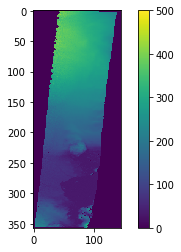

In [9]:
plt.imshow(x[::100, ::100], vmin=0, vmax=500);plt.colorbar()

In [10]:
x_ma = np.where(x > -10000, x, np.nan)

In [87]:
x_ma.shape

(35668, 14399)

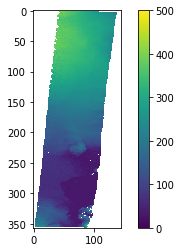

In [11]:
plt.imshow(x_ma[::100, ::100], vmin=0, vmax=500);plt.colorbar()

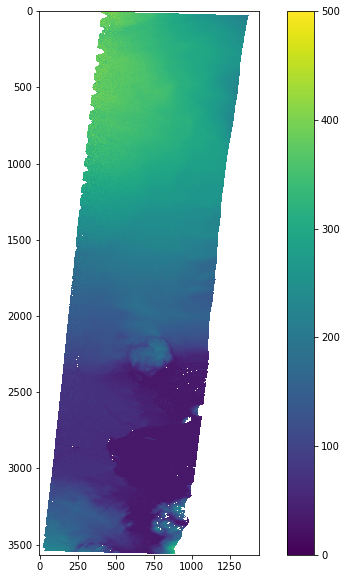

In [12]:
plt.figure(figsize=(10,10));plt.imshow(x_ma[::10, ::10], vmin=0, vmax=500);plt.colorbar()

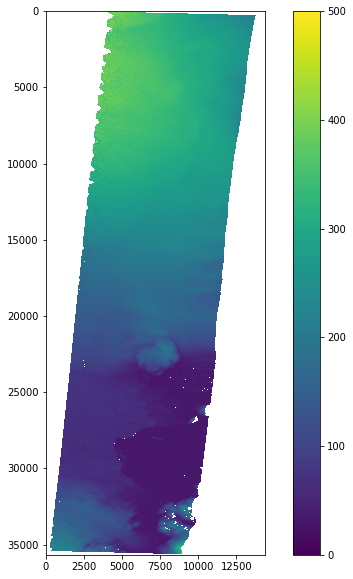

In [13]:
plt.figure(figsize=(10,10));plt.imshow(x_ma, vmin=0, vmax=500);plt.colorbar()

In [42]:
lats = np.linspace(77.49109, 76.50031, 35669)
lons = np.linspace(-22.74941,-21.94946, 14400)

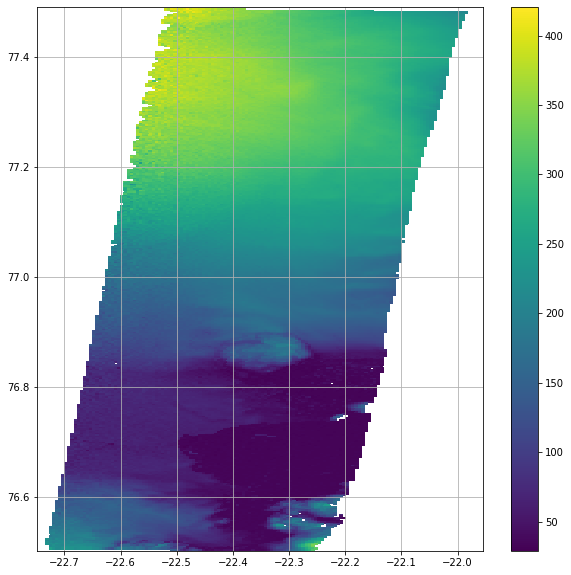

In [43]:
plt.figure(figsize=(10,10));plt.pcolormesh(lons[::100],lats[::100],x_ma[::100,::100]);plt.grid();plt.colorbar()

In [32]:
#swath_def = geometry.SwathDefinition(lons=35668, lats=14399)

In [76]:
# Area of original swath
area_id = 'ease'
description = 'ease grid north'
proj_id = 'greenl_00411_16'
proj_string = 'EPSG:4326'
width = 14399
height = 35668
area_extent = (-22.9, 76.5, -21.9, 77.5)
area_original = geometry.AreaDefinition(area_id, description, \
                                    proj_id, proj_string, width, 
                                    height, area_extent)\

### Original area and data have to be the same shape

In [14]:
x.shape

(35668, 14399)

In [77]:
area_original.shape

(35668, 14399)

In [78]:
# Area of new common grid in different coordinate system
area_id = 'ease'
description = 'ease grid north'
proj_id = 'greenl_00411_16'
proj_string = 'EPSG:6931'
width = 100
height = 100
area_extent = (-588579, -1401656, -506010, -1270693)
area_new = geometry.AreaDefinition(area_id, description, \
                                    proj_id, proj_string, width, 
                                    height, area_extent)\

In [79]:
area_new.shape

(100, 100)

In [80]:
xe = np.linspace(-588579, -506010, 101)
ye = np.linspace(-1401656, -1270693, 101)
xx, yy = np.meshgrid(xe, ye)

In [88]:
result = kd_tree.resample_nearest(area_original, x_ma, area_new, radius_of_influence=34000, fill_value=np.nan)

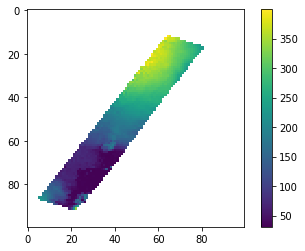

In [97]:
plt.imshow(result);plt.colorbar()

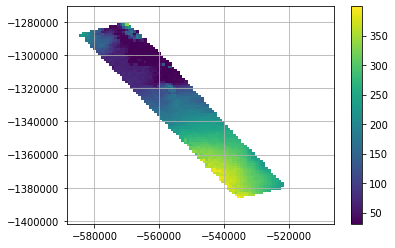

In [100]:
plt.pcolormesh(xx, yy, result);plt.colorbar();plt.grid()

In [93]:
#plt.pcolormesh(yy, xx, result);plt.colorbar()